# Basic Knowledge in Computer Vision

In [20]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Image Types

Load a color image, convert it to a grayscale, binary imagesrespectively, then display them.

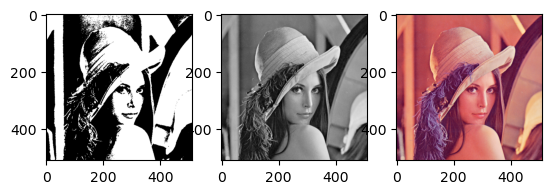

In [21]:
path = 'Images'
lena_filePath = os.path.join(path, "Lena.png")
lena_color = cv2.imread(lena_filePath)

lena_RGB = cv2.cvtColor(lena_color, cv2.COLOR_BGR2RGB) # Opencv uses BGR
lena_gray = cv2.cvtColor(lena_color, cv2.COLOR_BGR2GRAY) # Gray image
ret, lena_binary = cv2.threshold(lena_gray,127,255,cv2.THRESH_BINARY) # Binary image

# Plot images
plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(lena_binary, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(lena_gray, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(lena_RGB)
plt.show()

## Image File Formats

Load a color image in Python and resize it to half (e.g.,from 512x512 to 256x256), then convert it to grayscale and binaryimages respectively. Finally save them to bmp and jpeg format filesrespectively.Compare the file size of bmp and jpeg formats.

In [22]:
# Configuration for output format and destination
savedExt = ".jpg"
savedPath = 'Images/File-Formats-Practice'
path = 'Images'
lena_filePath = os.path.join(path, "Lena.png")

# Resize image to a standard square dimension
lena_color = cv2.resize(lena_color, (256, 256))

# Convert colors
lena_RGB = cv2.cvtColor(lena_color, cv2.COLOR_BGR2RGB) # Opencv uses BGR
lena_gray = cv2.cvtColor(lena_color, cv2.COLOR_BGR2GRAY) # Gray image
_,lena_binary = cv2.threshold(lena_gray,127,255,cv2.THRESH_BINARY) # Binary image

# Save images using matplotlib
plt.imsave(lena_filePath+"_color"+savedExt, lena_RGB)
plt.imsave(lena_filePath+"_gray"+savedExt, lena_gray, cmap = "gray")
plt.imsave(lena_filePath+"_binary"+savedExt, lena_binary, cmap = "gray")
#cv2.imwrite(lena_filePath+"_color"+savedExt, lena_color)
#cv2.imwrite(lena_filePath+"_gray"+savedExt, lena_gray)
#cv2.imwrite(lena_filePath+"_binary"+savedExt, lena_binary)

## Histogram

Read a color image, convert it to a grayscale, binary images respectively, and display them. Then show their histograms.

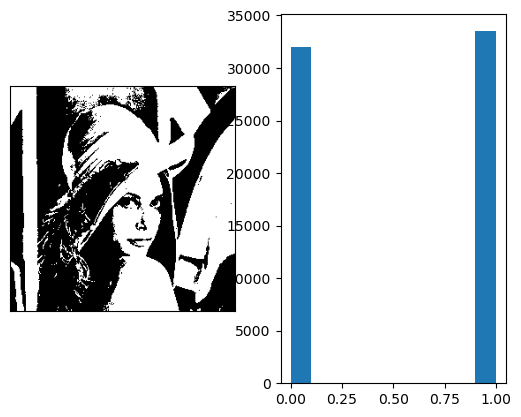

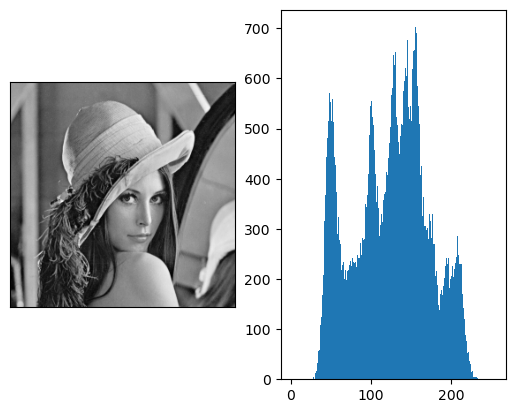

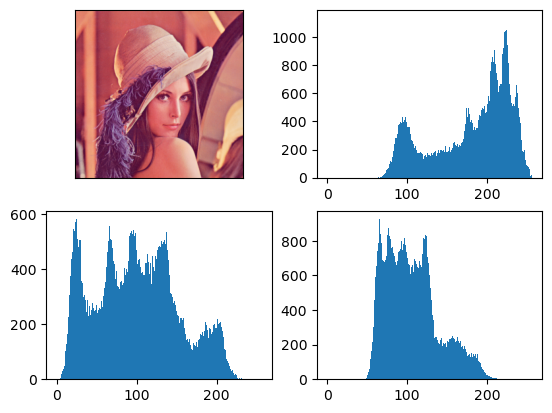

In [23]:
lena_binary = lena_binary / 255 # convert to 0 and 1

# Plot binary image and its histogram
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(lena_binary, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(lena_binary.ravel())
plt.show()

# Plot gray image and its histogram
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(lena_gray, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(lena_gray.ravel(), bins=256, range=[0, 256])
plt.show()

# Plot color image and histograms of three channels
plt.figure(3)
plt.subplot(2, 2, 1)
plt.imshow(lena_RGB)
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.hist(lena_color[:, :, 2].ravel(), bins=256, range=[0, 256])
plt.subplot(2, 2, 3)
plt.hist(lena_color[:, :, 1].ravel(), bins=256, range=[0, 256])
plt.subplot(2, 2, 4)
plt.hist(lena_color[:, :, 0].ravel(), bins=256, range=[0, 256])
plt.show()

Plot the pixel permutation of the gray image and its histogram.

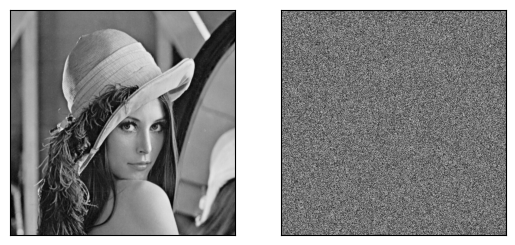

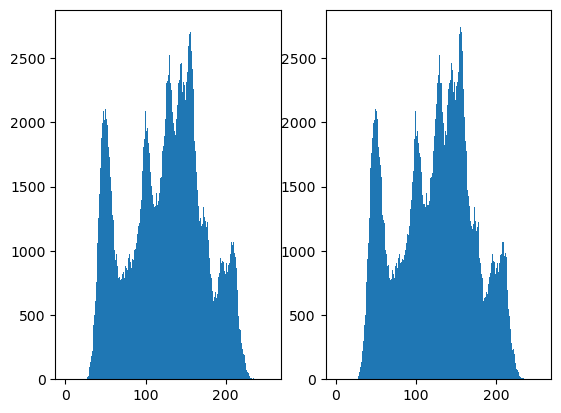

In [24]:
lena_color = cv2.imread(lena_filePath)
lena_gray = cv2.cvtColor(lena_color, cv2.COLOR_BGR2GRAY)

# Flatten the image into a column vector, permute pixels randomly and reshape back to 512x512
lena_gray_stretched = lena_gray.reshape(np.prod(lena_gray.shape), 1)
lena_gray_randperm = lena_gray_stretched[np.random.permutation(np.prod(lena_gray.shape))].reshape(512, 512)

# Compare Original Gray vs Scrambled 
plt.figure(4)
plt.subplot(1, 2, 1)
plt.imshow(lena_gray, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(lena_gray_randperm, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Compare Histograms (Original vs Scrambled)
plt.figure(5)
plt.subplot(1, 2, 1)
plt.hist(lena_gray.ravel(), bins=256, range=[0, 256])
plt.subplot(1, 2, 2)
plt.hist(lena_gray_randperm.ravel(), bins=256, range=[0, 256])
plt.show()

Read a demo image, and enhance contrast using histogramequalization, then show the comparison before and after histogramequalization and their histograms respectively.

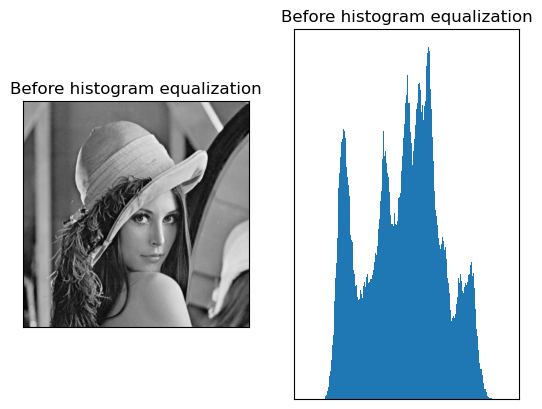

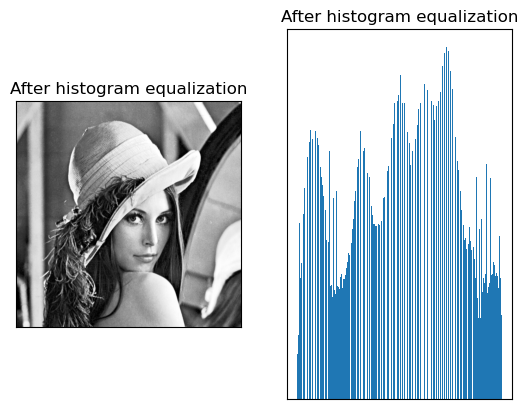

In [25]:
# Apply Histogram Equalization
lena_histEqualization = cv2.equalizeHist(lena_gray)

# Original Image and Histogram
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(lena_gray, cmap='gray')
plt.title("Before histogram equalization")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(lena_gray.ravel(), bins=256, range=[0, 256])
plt.title("Before histogram equalization")
plt.xticks([])
plt.yticks([])
plt.show()

# Equalized Image and Histogram
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(lena_histEqualization, cmap='gray')
plt.title("After histogram equalization")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.hist(lena_histEqualization.ravel(), bins=256, range=[0, 256])
plt.title("After histogram equalization")
plt.xticks([])
plt.yticks([])
plt.show()

## Edge detection
Read a demo image, and enhance contrast using histogram equalization, then show the comparison before and after histogram equalization and their histograms respectively.

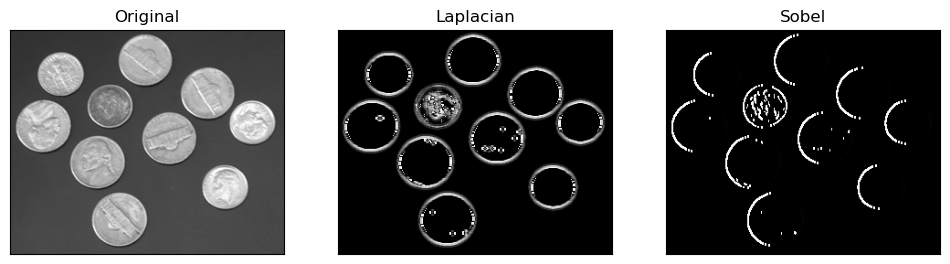

In [26]:
#from scipy.ndimage.filters import gaussian_laplace, sobel
from scipy.ndimage import gaussian_laplace, sobel

path = ""
coins_Filename = os.path.join(path, "Images/coins.png")
coins_org = cv2.imread(coins_Filename)

# Color conversion
coins_RGB = cv2.cvtColor(coins_org, cv2.COLOR_BGR2RGB) # Opencv uses BGR
coins_gray = cv2.cvtColor(coins_org, cv2.COLOR_BGR2GRAY) # Gray image

# Binary thresholding
_, coins_binary = cv2.threshold(coins_gray, 127, 255, cv2.THRESH_BINARY) # Binary image

# Apply filters
edge_laplacian = gaussian_laplace(coins_binary, sigma=1)
edge_sobel = sobel(coins_binary)

# Plotting results
plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 3, 1)
plt.imshow(coins_RGB)
plt.title('Original')
plt.xticks([])
plt.yticks([])

# Laplacian Filter
plt.subplot(1, 3, 2)
plt.imshow(edge_laplacian, cmap='gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])

# Sobel Filter
plt.subplot(1, 3, 3)
plt.imshow(edge_sobel, cmap='gray')
plt.title('Sobel')
plt.xticks([])
plt.yticks([])

plt.show()

## Convolution
Read the Lena image and convert it to a gray image, and add a ‘salt and pepper’ noise, then denoise it using conv2 with a Gaussian kernel and a median filter, respectively.

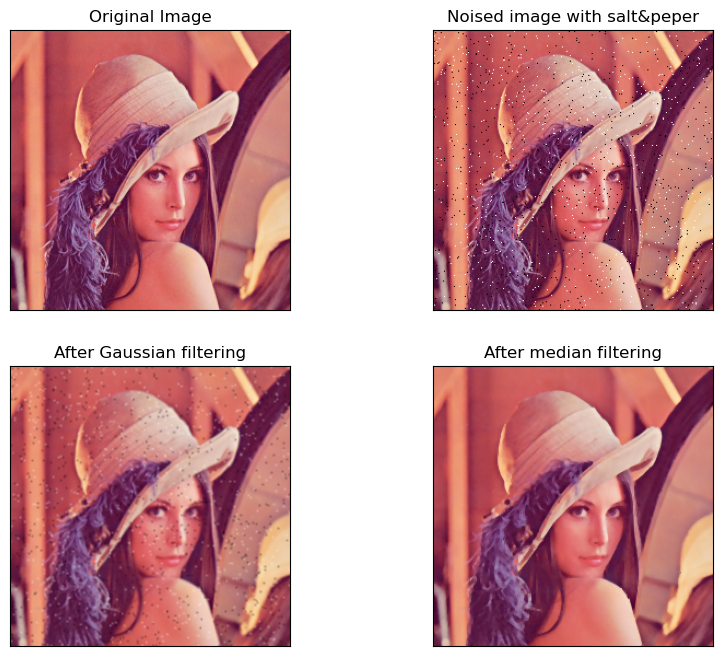

In [27]:
# Add noise to the image
lena_sp = add_salt_and_pepper(lena_RGB, 0.01)

# Apply Gaussian and Median Blur
lena_gaussianfiltered = cv2.GaussianBlur(lena_sp, (3,3), 0)
lena_medianfiltered = cv2.medianBlur(lena_sp, ksize=3)

# Plotting Results
plt.figure(figsize=(10, 8))

# Subplot 1: Original
plt.subplot(2, 2, 1)
plt.imshow(lena_RGB, cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

# Subplot 2: Salt & Pepper Noise
plt.subplot(2, 2, 2)
plt.imshow(lena_sp, cmap='gray')
plt.title("Noised image with salt&peper")
plt.xticks([])
plt.yticks([])

# Subplot 3: Gaussian Filter
plt.subplot(2, 2, 3)
plt.imshow(lena_gaussianfiltered, cmap='gray')
plt.title("After Gaussian filtering")
plt.xticks([])
plt.yticks([])

# Subplot 4: Median Filter
plt.subplot(2, 2, 4)
plt.imshow(lena_medianfiltered, cmap='gray')
plt.title("After median filtering")
plt.xticks([])
plt.yticks([])

plt.show()

## Frequency Domain Filtering

Read a gray Lena image, try low and highpass Gaussian filtering in the frequency domain.

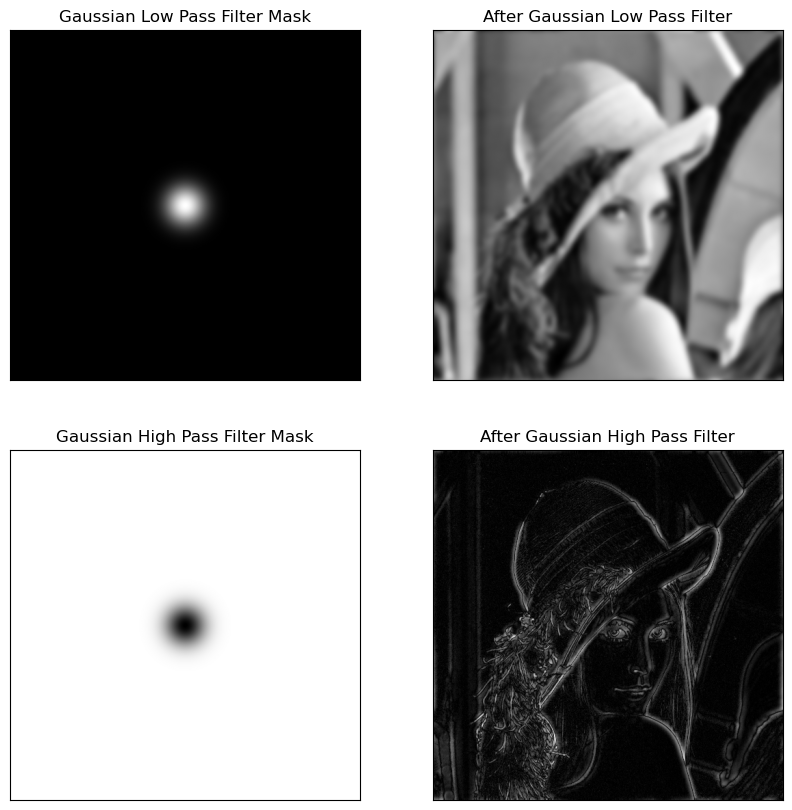

In [29]:
# Helper function to normalize image
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

# Normalize and Compute FFT
I = im2double(lena_gray)
I1 = np.fft.fft2(I) # Compute 2D Fourier Transform
I1_fftshift = np.fft.fftshift(I1) # Shift zero frequency component to the center

# Image dimensions
imgWidth = lena_gray.shape[0]
imgHeight = lena_gray.shape[1]
center_width = imgWidth / 2
center_height = imgHeight / 2

# Filter parameters
D0 = 20 # Cut-off frequency
gaussian_lowPass_filter = np.zeros((imgWidth, imgHeight))
gaussian_highPass_filter = np.zeros((imgWidth, imgHeight))

# Generate Gaussian Filters (Low Pass and High Pass)
for rowI in range(imgWidth):
    for colJ in range(imgHeight):
        # Distance to the center of the image
        D = np.sqrt((rowI - center_width)**2 + (colJ - center_height)**2) 
        
        # Gaussian Low Pass Formula
        gaussian_lowPass_filter[rowI, colJ] = np.exp(-D**2 / (2 * (D0**2)))
        
        # Gaussian High Pass
        gaussian_highPass_filter[rowI, colJ] = 1 - gaussian_lowPass_filter[rowI, colJ]

# Apply Low Pass Filter in Frequency Domain
lena_gray_filtered_lowpass = np.fft.ifftshift(np.multiply(I1_fftshift, gaussian_lowPass_filter))
lena_gray_filtered_lowpass = abs(np.fft.ifft2(lena_gray_filtered_lowpass))

# Apply High Pass Filter in Frequency Domain
lena_gray_filtered_highpass = np.fft.ifftshift(np.multiply(I1_fftshift, gaussian_highPass_filter))
lena_gray_filtered_highpass = abs(np.fft.ifft2(lena_gray_filtered_highpass))

plt.figure(figsize=(10, 10))

# 1. Low Pass Filter Mask
plt.subplot(2, 2, 1)
plt.imshow(gaussian_lowPass_filter, cmap='gray')
plt.title('Gaussian Low Pass Filter Mask')
plt.xticks([]), plt.yticks([])

# 2. Low Pass Result
plt.subplot(2, 2, 2)
plt.imshow(lena_gray_filtered_lowpass, cmap='gray')
plt.title('After Gaussian Low Pass Filter')
plt.xticks([]), plt.yticks([])

# 3. High Pass Filter Mask
plt.subplot(2, 2, 3)
plt.imshow(gaussian_highPass_filter, cmap='gray')
plt.title('Gaussian High Pass Filter Mask')
plt.xticks([]), plt.yticks([])

# 4. High Pass Result
plt.subplot(2, 2, 4)
plt.imshow(lena_gray_filtered_highpass, cmap='gray')
plt.title('After Gaussian High Pass Filter')
plt.xticks([]), plt.yticks([])

plt.show()

## Mapping

Create a 3x3 image with value [1 2 3; 4 5 6; 7 8 9], conduct a scaling operation (either along width or height), then use forward and inverse mapping (with nearest neighbor interpolation) to generate a new image, respectively.

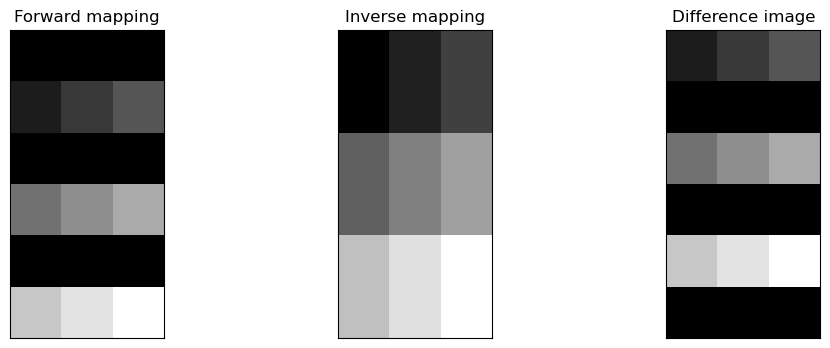

In [ ]:
# Define a testing image
img = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 

# Define a scaling operation (Scale Y by 2, X by 1)
T_scaling = np.matrix('1 0; 0 2') 

# Dimensionality of target image
imgHeight, imgWidth = img.shape
tempSize = T_scaling.dot(np.array([imgWidth, imgHeight]).reshape(2, 1)).T
newWidth = int(tempSize[0, 0])  # Cast to int to avoid TypeError in np.zeros
newHeight = int(tempSize[0, 1]) 

# Forward Mapping
X, Y = np.meshgrid(np.arange(1, imgWidth + 1), np.arange(1, imgHeight + 1))
TargetCoor = T_scaling.dot(np.array([Y.reshape(9, 1)[:, 0], X.reshape(9, 1)[:, 0]]))
Xt = np.array(TargetCoor[0, :])
Yt = np.array(TargetCoor[1, :])
newImage_forwardMap = np.zeros((newHeight, newWidth))
image_1D = np.array(img.T.reshape(9, 1))

for i in range(Xt.shape[1]):
    # Cast indices to int to prevent indexing errors
    newImage_forwardMap[int(Yt[0, i]) - 1, int(Xt[0, i]) - 1] = image_1D[i, 0]


# Inverse Mapping
# Create array of destination x,y coordinates
X, Y = np.meshgrid(np.arange(1, newWidth + 1), np.arange(1, newHeight + 1)) 
sourceCoor = np.linalg.inv(T_scaling).dot(np.array([X.T.reshape(18, 1)[:, 0], Y.T.reshape(18, 1)[:, 0]]))
Xs = np.ceil(np.array(sourceCoor[0, :]))
Ys = np.ceil(np.array(sourceCoor[1, :]))
newImage = np.zeros((1, 18)) 

for i in range(Xs.shape[1]):
    # Cast indices to int to prevent indexing errors
    newImage[0, i] = img[int(Ys[0, i]) - 1, int(Xs[0, i]) - 1]
newImage = np.transpose(newImage.reshape(3, 6))

# Calculate the difference between the two methods
diff = abs(newImage_forwardMap - newImage)

# Plotting Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(newImage_forwardMap, cmap='gray')
plt.title('Forward mapping')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(newImage, cmap='gray')
plt.title('Inverse mapping')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='gray')
plt.title('Difference image')
plt.xticks([])
plt.yticks([])

plt.show()

## 2D Non-linear operations

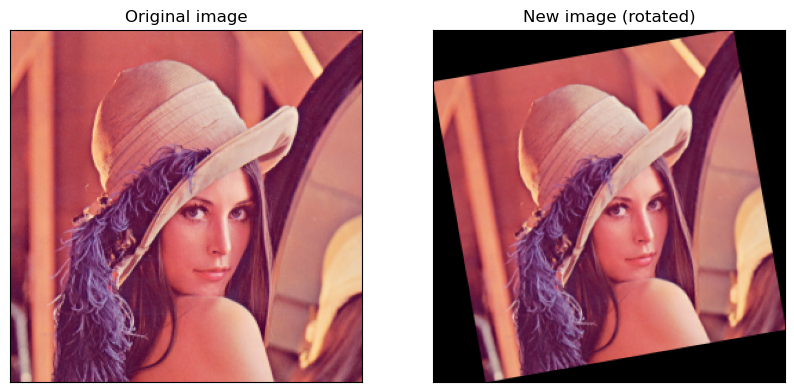

In [ ]:
def rotate_bound(image, angle):
    # Grab the dimensions of the image and then determine the center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # Grab the rotation matrix (applying the negative of the angle to rotate clockwise),
    # then grab the sine and cosine (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # Compute the new bounding dimensions of the image to prevent cutting off corners
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # Perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

# Set rotation angle
theta = 10
# Apply rotation function
newImage = rotate_bound(lena_RGB, theta)

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_RGB, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap='gray')
plt.title('New image (rotated)')
plt.xticks([])
plt.yticks([])

plt.show()